In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def preprocess_image(image_path, pattern_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Thresholding to segment the clothing item
    _, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)

    # Perform Canny edge detection
    edges = cv2.Canny(thresh, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask to fill the contours
    mask = np.zeros_like(gray)

    # Fill contours on the mask
    cv2.fillPoly(mask, contours, 255)

    # Dilate the mask to create an outline around the clothing item region
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.dilate(mask, kernel, iterations=1)

    # Read the pattern image
    pattern = cv2.imread(pattern_path)

    # Resize the pattern to match the size of the input image
    pattern = cv2.resize(pattern, (image.shape[1], image.shape[0]))

    # Invert the mask
    mask_inv = cv2.bitwise_not(mask)

    # Set the region inside the contours to the pattern
    pattern_masked = cv2.bitwise_and(pattern, pattern, mask=mask)

    # Set the region outside the contours to the original clothing item region
    clothing_only = cv2.bitwise_and(image, image, mask=mask_inv)

    # Combine the pattern and the clothing item region
    result = cv2.add(pattern_masked, clothing_only)

    # Resize the result image to 300x300
    result_resized = cv2.resize(result, (320, 320))

    return result_resized

In [ ]:
# Preprocess first image
result_resized1 = preprocess_image('/content/plain-tshirt-women.png', '/content/5.jpg')

# Preprocess second image
result_resized2 = preprocess_image('/content/skirt-short.png', '/content/27.jpg')

# Display the images using matplotlib
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

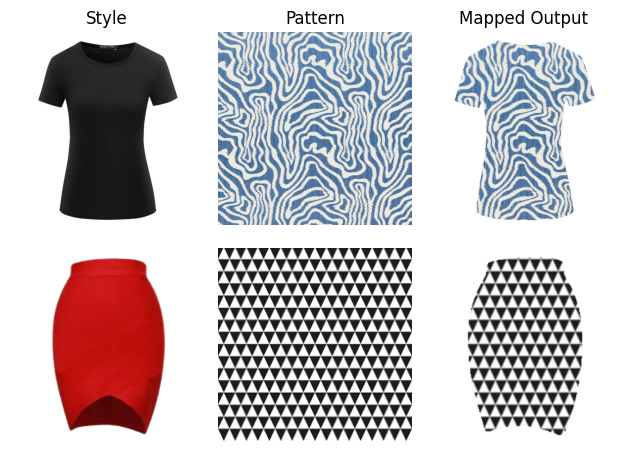

In [ ]:
# Display the first clothing item
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(cv2.imread('/content/plain-tshirt-women.png'), cv2.COLOR_BGR2RGB))
plt.title("Style")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(cv2.imread('/content/5.jpg'), cv2.COLOR_BGR2RGB))
plt.title("Pattern")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(result_resized1, cv2.COLOR_BGR2RGB))
plt.title("Mapped Output")
plt.axis('off')

# Display the second clothing item
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(cv2.imread('/content/skirt-short.png'), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(cv2.imread('/content/27.jpg'), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(result_resized2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


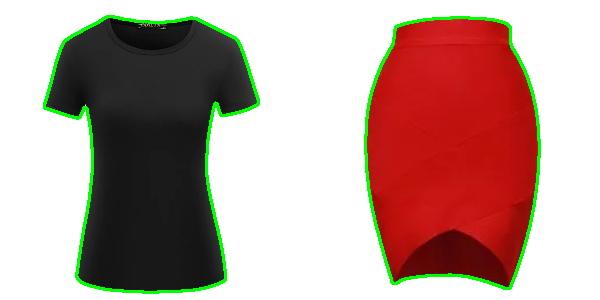

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def generate_outline(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Resize the image to (300, 300)
    image = cv2.resize(image, (300, 300))

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Perform Canny edge detection to detect edges
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edged image
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

    return image

# Generate outlines for both images
outline1 = generate_outline('/content/plain-tshirt-women.png')
outline2 = generate_outline('/content/skirt-short.png')

# Concatenate images horizontally
result = np.hstack((outline1, outline2))

# Display the result
cv2_imshow(result)